Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
05/11/2018
</small></small></p>

## Cálculo numérico

En este capítulo presentamos brevemente algunas herramientas de cálculo numérico disponibles en [scipy](https://www.scipy.org/).

### Raíces de polinomios

En el tema dedicado a los *arrays* vimos algunas funciones de álgebra lineal numérica, entre las que destaca el solucionador de sistemas de ecuaciones lineales.

Las ecuaciones no lineales son en general más complicadas de resolver porque normalmente requieren aproximaciones sucesivas. Sin embargo, las raíces de polinomios son un caso especial que puede resolverse [de forma directa](https://en.wikipedia.org/wiki/Companion_matrix). Para ello se utiliza la función `roots`, que calcula las raíces de un polinomio expresado mediante la lista de sus coeficientes en orden decreciente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Por ejemplo, para resolver la ecuación

$$x^4=16$$

la expresamos como un polinomio $p(x) = x^4- 16 = (1,0,0,0,-16) \cdot (x^4, x^3, x^2, x^1, x^0) = 0$.

In [2]:
np.roots([1,0,0,0,-16])

array([-2.00000000e+00+0.j,  1.66533454e-16+2.j,  1.66533454e-16-2.j,
        2.00000000e+00+0.j])

Salvo ruido numérico, las soluciones obtenidas son $\pm2, \pm2i$.

Otro ejemplo: resuelve

$$ x^3 -2 x^2 + 5x + 6 = 0$$

In [3]:
np.roots([1,-2,-5,6])

array([-2.,  3.,  1.])

### Solución numérica de ecuaciones no lineales

Para resolver una ecuación cualquiera $f(x)=0$ tenemos que definir la función $f$ en Python de la forma usual y llamar a `fsolve` con un punto de partida.

In [4]:
from scipy.optimize import fsolve

Resuelve

$$sin(x)+cos(2x)=0$$

In [5]:
from math import sin, cos

def f(x):
    return sin(x) + cos(2*x)

fsolve(f, 0)

array([-0.52359878])

Para hacer pruebas rápidas podemos definir sobre la marcha una función anónima.

In [6]:
fsolve(lambda x: sin(x) + cos(2*x), 0)

array([-0.52359878])

Otro ejemplo: resuelve la ecuación de Kepler $x - b \sin(x)=a$ para $b=0.3$ y $a=0.4$.

In [7]:
a = 0.4
b = 0.3

def f(x):
    return x - b*sin(x) - a

fsolve(f,0.2)

array([0.55913626])

Las funciones matemáticas se pueden importar de `math`, de `scipy` o de `numpy`.

El resolvedor `fsolve` admite sistemas de ecuaciones no lineales $\vec f(\vec x)=\vec 0$. El proceso es el mismo: se define la función vectorial $f$ que describe el sistema de ecuaciones y se da un punto de partida para las incógnitas.

Resuelve

$$
\begin{align*}
x^2 - 3y &= 10\\
sin(x)+y &= 5
\end{align*}
$$

In [8]:
def fun(z):
    x,y = z
    return [ x**2 - 3*y - 10
           , sin(x) + y - 5]

fsolve(fun,[0.1,-0.1])

array([5.2511881 , 5.85832548])

Las ecuaciones no lineales pueden tener varias soluciones. La que encuentra `fsolve` depende del punto de partida.  

### Minimización

Un problema muy común es encontrar el mínimo de una cierta función de varias variables:
$\DeclareMathOperator*{\argmin}{argmin}
\argmin_{\vec x}f(\vec x)$. Para ello usamos `minimize`, que admite la función a minimizar y un punto de partida.

In [9]:
from scipy.optimize import minimize

Encuentra $(x,y)$ que minimiza $(x-1)^2 + (y-2)^2-x+3y$

In [10]:
def fun(z):
    x,y = z
    return (x-1)**2 + (y-2)**2 - x + 3*y

minimize(fun,[0.1,-0.1])

      fun: 2.500000000000014
 hess_inv: array([[ 0.57758622, -0.18103452],
       [-0.18103452,  0.92241375]])
      jac: array([ 0.00000000e+00, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.49999999, 0.49999988])

El resultado es un diccionario con información útil sobre el proceso de optimización.

Como este problema es solo de dos variables podemos ver en 3D la función y la posición del mínimo.

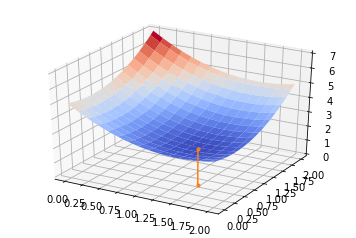

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

r = np.linspace(0,2,30)
x,y = np.meshgrid(r,r)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = fun((x,y))

ax.plot_surface(x,y,z, cmap=cm.coolwarm, linewidth=0.5, rstride=2, cstride=2);

r = minimize(fun,[0.1,-0.1])

xo,yo  = r['x']

ax.plot3D([xo,xo],[yo,yo],[0,fun((xo,yo))],'.-');

La función anterior es cuadrática y tiene un único mínimo local. Si la función tiene varios mínimos locales la solución dependerá del punto de partida:

In [12]:
def fun(z):
    x,y = z
    return np.cos(y)/(1+x**2)

minimize(fun,[0.1,0.1])

      fun: -0.9999999999825728
 hess_inv: array([[ 0.50080394, -0.00874365],
       [-0.00874365,  1.09523467]])
      jac: array([-1.07288361e-06,  5.86360693e-06])
  message: 'Optimization terminated successfully.'
     nfev: 112
      nit: 21
     njev: 28
   status: 0
  success: True
        x: array([-5.45133342e-07,  3.14159851e+00])

El mínimo encontrado es $(0,\pi)$, pero si cambiamos ligeramente el punto de partida encontramos otro:

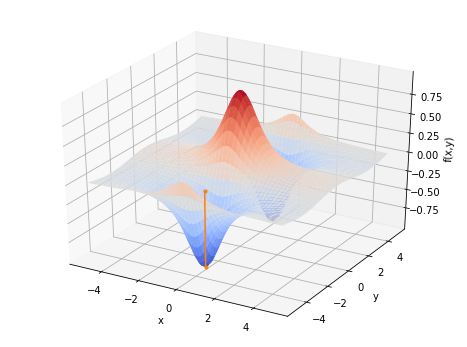

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

r = np.linspace(-5,5,100)
x,y = np.meshgrid(r,r)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

z = fun((x,y))

ax.plot_surface(x,y,z, cmap=cm.coolwarm, linewidth=0.5, rstride=2, cstride=2);

r = minimize(fun,[0.1,-0.1])

xo,yo  = r['x']

ax.plot3D([xo,xo],[yo,yo],[0,fun((xo,yo))],'.-');
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x,y)');

### Derivación numérica

A veces deseamos calcular la derivada de una función cuya expresión analítica se desconoce o es muy complicada, pero que podemos evaluar porque la tenemos en forma de código. Una posibilidad es calcular una aproximación con un incremento finito pequeño. Esto se consigue con `derivative`.

In [14]:
from scipy.misc import derivative

Calcula una aproximación numérica para $f'(2)$ cuando $f(x) = \sin(2x)*\exp(\cos(x))$

In [15]:
from math import sin,cos, exp

def f(x):
    return sin(2*x)*exp(cos(x))

derivative( f , 2 , dx=1E-6  )

-0.40836700757052036

El valor real es:

In [16]:
(lambda x: (-sin(x)*sin(2*x) + 2*cos(2*x))*exp(cos(x)))(2)

-0.40836700756782335

No está mal, pero la precisión depende del incremento elegido, cuyo valor óptimo depende de la suavidad de la función. 

Es mejor usar el paquete [numdifftools](https://media.readthedocs.org/pdf/numdifftools/latest/numdifftools.pdf), que proporciona técnicas numéricas más precisas.

    > pip install numdifftools

In [17]:
import numdifftools as nd

df = nd.Derivative(f)

df(2)

array(-0.40836701)

In [18]:
df = nd.Derivative(f, full_output=True, order=4)
df(2)

(array(-0.40836701),
 info(error_estimate=array(7.92144128e-14), final_step=array(0.01716582), index=array([5])))

### Integración numérica

Para calcular integrales definidas usamos `quad`.

In [19]:
from scipy.integrate import quad

Calcula una aproximación numérica a la integral definida

$$\int_0^1 \frac{4}{1+x^2}dx$$

In [20]:
quad(lambda x: 4/(1+x**2),0,1)

(3.1415926535897936, 3.4878684980086326e-14)

Devuelve el resultado y el error estimado.

### Ecuaciones diferenciales

Hemos dedicado otro tema a la solución numérica de ecuaciones diferenciales. Aquí simplemente recordamos la forma de usar `odeint` con el ejemplo de un oscilador armónico con amortiguamiento.

Resuelve

$$\ddot{x}+0.95x+0.1\dot{x}=0$$

para $x(0)=10$, $\dot{x}(0)=0, t\in[0,20]$

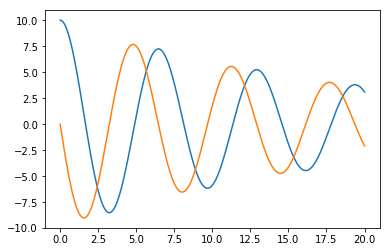

In [21]:
from scipy.integrate import odeint

def zdot(z,t):
    x,v = z
    return [v,-0.95*x-0.1*v]

t = np.linspace(0,20,1000)
x,v = odeint(zdot,[10,0],t).T
plt.plot(t,x,t,v);

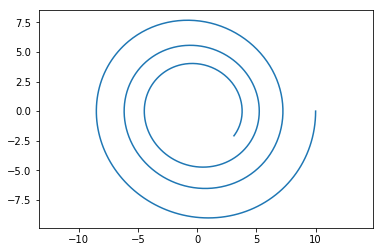

In [22]:
plt.plot(x,v);
plt.axis('equal');